# This notebook calculates Saturation Pressures for MI using the MafiCH model (Allison et al., 2022). 
It makes use of a modified version of the script published in Allison et al. (2022, Contributions to #Mineralogy and Petrology), which has been re-designed to run as a module in Jupyter lab. The main changes are as follows:
1) You do not need a specific file structure. Simply use the new function create_mafich_inputfile(Sample_Data,sample_cols), to convert your data to the required format. 
2) The part of the script that runs the model has been converted to a callable function (run_mafich(satpressinput,satpressoutput))

#All calculations using this script or other aspects of the MafiCH model should cite: Allison et al., MafiCH: a general model for H2O-CO2 solubility in mafic magmas. Contributions to Mineralogy and Petrology

## Load necessary dependencies and the MafiCH module

In [1]:
import pandas as pd
import os
import MafiCH_satPs as mch

## Set your working folder and path to files
Namely, set the path to the input file and output file (they don't need to exist at this time, they will be created by the script)

In [5]:
## This sets the working folder, if you place all your files in the same folder as the script and notebook, no need to change this line.
working_folder=os.getcwd()

## This sets the path to the input file created by create_mafich_inputfile
satpressinput = working_folder+'/'+ 'MafiCH_satpress_input.csv'

## This sets the path to the output file
satpressoutput = working_folder+'/'+'MafiCH_satpress_output.csv'

## Load in your data
You should edit the column headers in sample_cols to match the column headers in your specific file. DO NOT change the order of the strings. 

In [6]:
## Load in your data

Sample_Data=pd.read_excel("Supplement_Wieser_et_al_G3.xlsx", sheet_name='Melt_Inclusions')
display(Sample_Data.head())

## Set your column names (RESPECT THE ORDER!!!!)
# LLs samples

sample_cols = ['Sample Name',	
                'H2O (wt%) (wt%, PEC-corr)',	
                'Total CO2 (glass + bubble, ppm)',	
                'SiO2 (wt%, PEC-corr)',	
                'TiO2 (wt%, PEC-corr)',	
                'Al2O3 (wt%, PEC-corr)',	
                'FeO (wt%, PEC-corr)',	
                'MnO (wt%, PEC-corr)',	
                'MgO (wt%, PEC-corr)',	
                'CaO (wt%, PEC-corr)',	
                'Na2O (wt%, PEC-corr)',	
                'K2O (wt%, PEC-corr)',	
                'P2O5 (wt%, PEC-corr)']


## CREATE THE INPUT FILE
mch.create_mafich_inputfile(Sample_Data,sample_cols)

,Description,Sample Name,"Specific ID (LL8 - lab code for F8 Mid July, LL7- lab code for Aug 1st, LL4- lab code for May 30th)","Classification (1=bubble with fermi diad, 2=No bubble, 3=bubble but no fermi diad)",Cracked (for ones without diads),"Na2O (wt%, measured)","Al2O3 (wt%, measured)","P2O5 (wt%, measured)","CaO (wt%, measured)","K2O (wt%, measured)",...,"Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)","Magmasat Saturation Pressure Min CO2 (glass+bubble, PEC corr,-1 sigma splitting -1 sigma bubble vol))","Magmasat Saturation Pressure (Glass only, PEC corrected)",Magmasat Saturation Pressure (mean bubble CO2 from EOS+Glass CO2; PEC corrected),Magmasat Saturation Pressure (max bubble CO2 from EOS+Glass CO2; PEC corrected),Magmasat Saturation Pressure (min bubble CO2 from EOS+Glass CO2; PEC corrected),"Shishkina Saturation pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)","Shishkina Saturation pressure Min CO2 (glass+bubble, PEC corr,-1 sigma splitting -1 sigmabubble vol)",Shishkina Saturation pressure (Glass only CO2),Shishkina Saturation pressure (EOS method - glass+ reconstructed bubble)
0,1,LL8_613b,Fissure 8 (Mid July),1,NaN,2.8528,14.9080,0.2649,12.2542,0.4034,...,440,200,70,460,610,280,519.017638,240.244165,61.217817,543.710679
1,2,LL8_615,Fissure 8 (Mid July),1,NaN,2.8114,14.4189,0.3026,12.2457,0.4403,...,610,190,70,650,870,370,723.216448,228.749112,59.699491,764.009145
2,3,LL8_617_a,Fissure 8 (Mid July),1,NaN,2.7212,14.7306,0.3789,12.4949,0.4211,...,600,270,80,680,910,390,690.876996,316.357286,63.990493,774.046353
3,4,LL8_623_b,Fissure 8 (Mid July),1,NaN,2.6459,14.9646,0.3763,12.4287,0.5646,...,1550,450,70,540,710,310,1596.815651,516.027112,40.961717,609.609418
4,5,LL8_626,Fissure 8 (Mid July),1,NaN,2.7685,14.7415,0.2647,12.2405,0.4185,...,1080,260,50,170,220,110,1183.193159,303.234906,11.958965,195.618260


,sample,dissolved H2O wt%,dissolved CO2 ppm,wt% SiO2,wt% TiO2,wt% Al2O3,wt% FeO,wt% MnO,wt% MgO,wt% CaO,wt% Na2O,wt% K2O,wt% P2O5
0,LL8_613b,0.206067,248.344846,49.770,2.394,12.900,11.336,0.142,9.328,10.702,2.469,0.349,0.229
1,LL8_615,0.182499,397.739083,49.676,1.815,10.928,11.336,0.151,13.612,9.435,2.131,0.334,0.229
2,LL8_617_a,0.181196,468.581356,49.028,2.009,11.323,11.338,0.135,13.349,9.757,2.092,0.324,0.291
3,LL8_623_b,0.170695,1001.964557,48.418,2.448,11.895,11.331,0.177,12.514,10.022,2.103,0.449,0.299
4,LL8_626,0.178975,629.467127,49.215,2.027,11.612,11.331,0.172,12.783,9.789,2.181,0.330,0.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,LL8_400_b,0.173048,34.826259,49.508,2.100,10.774,11.335,0.187,13.183,9.887,2.080,0.337,0.258
99,LL8_155_c,0.184080,64.044277,49.468,1.999,11.505,11.338,0.168,12.453,9.948,2.286,0.266,0.207
100,LL4_39b,0.287698,260.403876,51.579,2.151,13.568,11.409,0.164,6.799,10.503,2.723,0.381,0.257
101,LL7_205b,0.179658,34.010063,50.008,2.059,11.842,11.338,0.173,11.378,9.999,2.276,0.385,0.186


## Now let's run MafiCH. 
It will create the output file as .csv file, but also produce the dataframe here if you want to store it or plot. 

In [7]:
SatP_MafiCH_LLs=mch.run_mafich(satpressinput,satpressoutput)
SatP_MafiCH_LLs


,sample,dissolved H2O wt%,dissolved CO2 ppm,wt% SiO2,wt% TiO2,wt% Al2O3,wt% FeO,wt% MnO,wt% MgO,wt% CaO,wt% Na2O,wt% K2O,wt% P2O5,Pressure (bar),XfH2O
0,LL8_615,0.182499,397.739083,49.676,1.815,10.928,11.336,0.151,13.612,9.435,2.131,0.334,0.229,247,0.019
1,LL8_617_a,0.181196,468.581356,49.028,2.009,11.323,11.338,0.135,13.349,9.757,2.092,0.324,0.291,276,0.017
2,LL8_623_b,0.170695,1001.964557,48.418,2.448,11.895,11.331,0.177,12.514,10.022,2.103,0.449,0.299,716,0.006
3,LL8_626,0.178975,629.467127,49.215,2.027,11.612,11.331,0.172,12.783,9.789,2.181,0.330,0.209,388,0.012
4,LL8_404_a,0.178259,625.130140,48.902,2.103,11.534,11.334,0.137,12.994,9.881,2.183,0.414,0.166,302,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,LL8_400_b,0.173048,34.826259,49.508,2.100,10.774,11.335,0.187,13.183,9.887,2.080,0.337,0.258,20,0.212
98,LL8_155_c,0.184080,64.044277,49.468,1.999,11.505,11.338,0.168,12.453,9.948,2.286,0.266,0.207,35,0.136
99,LL4_39b,0.287698,260.403876,51.579,2.151,13.568,11.409,0.164,6.799,10.503,2.723,0.381,0.257,190,0.057
100,LL7_205b,0.179658,34.010063,50.008,2.059,11.842,11.338,0.173,11.378,9.999,2.276,0.385,0.186,22,0.206


## If we want we plot things here

Text(0, 0.5, 'Pressure (bar)')

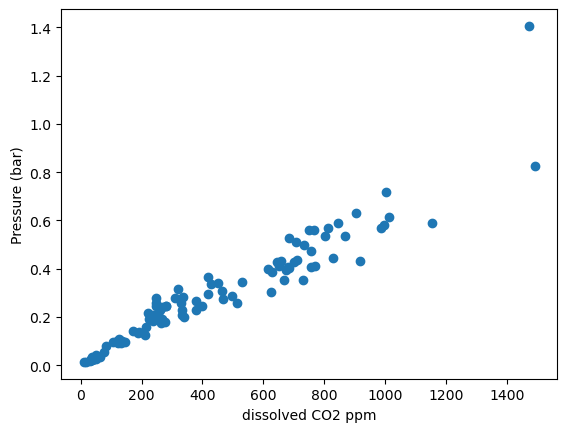

In [8]:
import matplotlib.pyplot as plt

x='dissolved CO2 ppm'
y='Pressure (bar)'

plt.scatter(SatP_MafiCH_LLs[x],SatP_MafiCH_LLs[y]/1000)
plt.xlabel(x)
plt.ylabel(y)
